# 单变量统计

**单变量统计只单独考虑每个特征，不考虑特征与特征之间的内在联系。如果一个特征只有在与另一个特征合并时才具有信息量，那么这个特征将会被舍弃**

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cancer = load_breast_cancer()

In [3]:
# 获得确定性的随机数
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50))

In [4]:
# 向数据中添加噪声特征
# 前30个特征来自数据集，后50个是噪声
X_w_noise = np.hstack([cancer.data,noise])
X_train,X_test,y_train,y_test = train_test_split(X_w_noise,cancer.target,random_state=0,test_size=0.5)

In [5]:
# 使用f_classif(默认值)和SelectPercentile来选择50%的特征
select = SelectPercentile(percentile=50)
select.fit(X_train,y_train)

SelectPercentile(percentile=50,
         score_func=<function f_classif at 0x111cc9c80>)

(284, 80)
(284, 40)


Text(0.5,0,'Sample index')

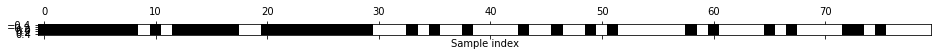

In [6]:
# 对数据集进行变换
X_train_selected = select.transform(X_train)

print(X_train.shape) # 原始数据维数
print(X_train_selected.shape) # 筛选后的特征维数，发现大部分的噪音特征会被删除掉。

# 得到的所有
mask = select.get_support() #得到对特征筛选后的结果
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Sample index")

In [7]:
from sklearn.linear_model import LogisticRegression

In [13]:
# 对测试数据进行变换
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train,y_train) # 使用带有噪音数据的数据集进行训练
print(lr.score(X_test,y_test)) # 查看匹配率

lr.fit(X_train_selected,y_train) # 使用经过特征筛选后的数据进行训练
print(lr.score(X_test_selected,y_test)) # 查看匹配率

0.9298245614035088
0.9403508771929825
